In [1]:
import pandas as pd
import numpy as np
import re
from scipy import stats
import seaborn as sns
import glob


%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def bootstrap(AllCore,AllECR,it=10000):
    BtECR = dict()
    BtCore = dict()
    for lab in Label:
        BtECR[lab] = []
        BtCore[lab] = []
    for it in range(0,it):
        ECRMean = []
        CoreMean = []
        for aa in Label:

            index = np.random.randint(len(AllECR), size=len(AllECR[aa]))

            ECRMean.append(np.sum(np.array(AllECR[aa])[index]))
            CoreMean.append(np.sum(np.array(AllCore[aa])[index]))
        ECRMean = np.array(ECRMean)/np.sum(ECRMean)*100.0
        CoreMean = np.array(CoreMean)/np.sum(CoreMean)*100.0
        for i in range(0,len(ECRMean)):
            BtECR[Label[i]].append(ECRMean[i])
            BtCore[Label[i]].append(CoreMean[i])
    return(BtCore,BtECR)

In [3]:
myAmino = ["R","H","K","D","E","S","T","N","Q","C","G","P","A","V","I","L","M","F","Y","W"]

In [4]:
#Load PixelDB
path = "/media/vince/Postdoc/PixelDB/gitPixelDB/PixelDB/"
PixelDB = pd.read_csv(path+"PixelDB.CSV")
len(PixelDB["name"])

1966

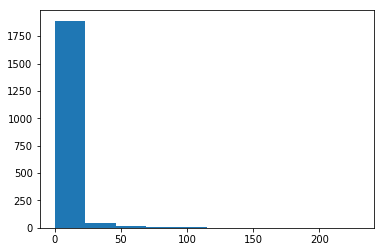

0    902
1    177
2    142
3    126
4    100
5     87
6     68
7     59
8     36
9     34
dtype: int64
(214, 100)


In [5]:
PixelDB["full_peptide_sequece_len"] = PixelDB["full_peptide_sequece"].str.len()

plt.hist(PixelDB["full_peptide_sequece_len"]-PixelDB["peptide_length"])
plt.show()
print((PixelDB["full_peptide_sequece_len"]-PixelDB["peptide_length"]).value_counts().sort_values(ascending=False)[0:10])
print(np.sum((PixelDB["full_peptide_sequece_len"]-PixelDB["peptide_length"] > 10)),100)


#PixelDB = PixelDB[PixelDB["full_peptide_sequece_len"]-PixelDB["peptide_length"] < 11]

In [6]:
#Look for missing Cluster
last = 0
for i in sorted(list(PixelDB["cluster_number"].unique())):
    if i - last != 1:
        print(i,last)
    last = i

In [7]:
print("Entries in DB:",len(PixelDB["cluster_number"]))
print("Receptor Cluster",len(PixelDB["cluster_number"].value_counts()))
print("Unique Binding Mode",len(PixelDB["unique_id"].value_counts()))
print("Binding mode with 2 plus peptide",np.sum((PixelDB["unique_id"].value_counts()) >= 2))
tmp = np.array(PixelDB["unique_id"].value_counts())
print("That represent:",np.sum(tmp[tmp > 2]))

('Entries in DB:', 1966)
('Receptor Cluster', 486)
('Unique Binding Mode', 728)
('Binding mode with 2 plus peptide', 275)
('That represent:', 1271)


In [8]:
np.sum(PixelDB["pdb_id"].value_counts() > 2)

15

In [9]:
#Some STAT on PixelDB

In [10]:
PixelDBecr = PixelDB.copy()
for uniid in list(np.unique(PixelDB["unique_id"])):
    sdf = PixelDB[PixelDB["unique_id"] == uniid]
    
    
    
    if not np.sum((np.array(sdf["longest_continuous_core"]) > 3) & (np.array(sdf["longest_continuous_ecr"]) > 3)) > 0:
        PixelDBecr = PixelDBecr[PixelDBecr["unique_id"] != uniid]
        continue
    #break

In [11]:
PixelDBoecr = PixelDB[PixelDB["longest_continuous_ecr"] > 3]

In [12]:
print("Entries in ECR",len(PixelDBoecr))
print("Unique Binding Mode",len(PixelDBoecr["unique_id"].value_counts()))


NoDual = PixelDBoecr[PixelDBoecr["core_ecr_alignment"].str.contains("D") == False]
print("Entire in ECR and NoDual",len(NoDual))
print("Unique Binding Mode",len(NoDual["unique_id"].value_counts()))

removed = PixelDBoecr[PixelDBoecr["core_ecr_alignment"].str.contains("D") == True]
print("Removed entries bm ECR",len(removed))
print("Unique Binding Mode",len(removed["unique_id"].value_counts()))

('Entries in ECR', 321)
('Unique Binding Mode', 122)
('Entire in ECR and NoDual', 123)
('Unique Binding Mode', 76)
('Removed entries bm ECR', 198)
('Unique Binding Mode', 57)


In [13]:
removed.groupby(by=["unique_id"]).max()["longest_continuous_ecr"].sort_values()[-10:]

unique_id
12_1     11
9_1      11
14_2     12
3_7      16
8_1      20
3_3      21
3_6      24
135_1    27
3_1      27
69_1     35
Name: longest_continuous_ecr, dtype: int64

In [14]:
print("Unique Binding Mode",len(PixelDBecr["unique_id"].value_counts()))
print("Exosite and ECR complexes",np.sum(PixelDBecr["longest_continuous_ecr"] > 3))

('Unique Binding Mode', 122)
('Exosite and ECR complexes', 321)


/media/vince/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


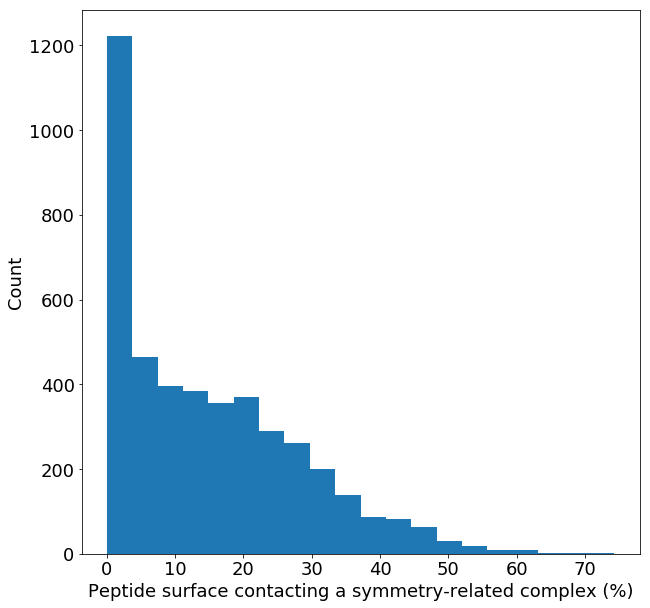

(5, 0.68209806157354613, 2991)
(10, 0.55096921322690995, 2416)
(15, 0.4321550741163056, 1895)
(20, 0.32474344355758267, 1424)
(50, 0.012542759407069556, 55)


In [15]:
carac = pd.read_table(path+"other_files/AllCp.dat",names=["PDB","Chain","CP","Tot_cont"],delimiter="\s")
figsize(10,10)
plt.hist(carac["CP"]*100,20)
plt.xlabel("Peptide surface contacting a symmetry-related complex (%)", fontsize=18 )
plt.ylabel("Count", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
for i in [5,10,15,20,50]:
    print(i,np.sum(carac["CP"]*100 > i)/float(len(carac["CP"])),np.sum(carac["CP"]*100 > i))

In [16]:
#Load PFAM
pdbmap_name = ["PDB","Chain","unk","name","PFAM","uniprot","range"]

pdbmap = pd.read_table(path+"other_files/pdbmap",names=pdbmap_name,delimiter="\t")
pdbmap = pdbmap.drop("unk",axis=1)
pdbmap_name = list(pdbmap.columns.values)
for c in pdbmap_name:
    pdbmap[c] = pdbmap[c].str.replace(';', '')
#cath-b-newest-all
cath_name = ["PDB","v","CATH","range"]
cathb = pd.read_table(path+"other_files/cath-b-newest-all",delimiter=" ",names=cath_name)

In [17]:

for ikl in range(0,3):
    torun = PixelDB
    if ikl == 0:
        print("Full")
    if ikl == 1:
        torun = PixelDBecr
        print("ECR")
    if ikl == 2:
        torun = PixelDBoecr
        print("ECRdist")
    
    UniquePFAM = dict()
    for uniid in list(np.unique(torun["PFAM"])):
        if str(uniid) == "nan":
            continue
        for v in uniid.split("_"):
            #print(v)
            if v not in UniquePFAM:
                UniquePFAM[v] = 0
            UniquePFAM[v] += 1
        #break
    
    UniqueCATH = dict()
    for uniid in list(np.unique(torun["CATH"])):
        if str(uniid) == "nan":
            continue
        for v in uniid.split("_"):
            #print(v)
            if v not in UniqueCATH:
                UniqueCATH[v] = 0
            UniqueCATH[v] += 1
            

    UniqueUniprot = dict()
    for uniid in list(np.unique(torun["uniprot"])):
        if str(uniid) == "nan":
            continue
        for v in uniid.split("_"):
            #print(v)
            if v not in UniqueUniprot:
                UniqueUniprot[v] = 0
            UniqueUniprot[v] += 1
    #Check for binding mode per CATH
    BindingModeCath = dict()
    for (unnid,cath) in zip(torun["unique_id"],torun["CATH"]):
        
        if str(cath) == "nan":
            continue
        for v in cath.split("_"):
            if v not in BindingModeCath:
                BindingModeCath[v] = []
            if uniid not in BindingModeCath[v]:
                BindingModeCath[v].append(uniid)
            
    
    
    print("PDB has this many unique PFAM",len(pdbmap["PFAM"].value_counts()))
    print("PixelDB has this many unique PFAM",len(UniquePFAM))
    print("Percentage = ",100.0*len(UniquePFAM) / float(len(pdbmap["PFAM"].value_counts())))
    #print("PixelDBecr has this many unique PFAM",len(PixelDBecr["PFAM"].value_counts()))

    print("PDB has this many unique uniprot",len(pdbmap["uniprot"].value_counts()))
    print("PixelDB has this many unique uniprot",len(UniqueUniprot))

    print("Percentage = ",100.0*len(UniqueUniprot) / float(len(pdbmap["uniprot"].value_counts())))

    #print("PixelDBecr has this many unique uniprot",len(PixelDBecr["uniprot"].value_counts()))
    print("PDB has this many unique CATH",len(cathb["CATH"].value_counts()))
    print("PixelDB has this many unique CATH",len(UniqueCATH))

    print("Percentage = ",100.0*len(UniqueCATH) / float(len(cathb["CATH"].value_counts())))
    
    print("Most frequence Cath")
    for w in sorted(UniqueCATH, key=UniqueCATH.get, reverse=True)[0:3]:
        print w, UniqueCATH[w]
    print("Most frequence uniprot")
    for w in sorted(UniqueUniprot, key=UniqueUniprot.get, reverse=True)[0:3]:
        print w, UniqueUniprot[w]
    print("Most frequence PFAM")
    for w in sorted(UniquePFAM, key=UniquePFAM.get, reverse=True)[0:3]:
        print w, UniquePFAM[w]
    break

Full
('PDB has this many unique PFAM', 7599)
('PixelDB has this many unique PFAM', 377)
('Percentage = ', 4.961179102513489)
('PDB has this many unique uniprot', 33019)
('PixelDB has this many unique uniprot', 758)
('Percentage = ', 2.2956479602653017)
('PDB has this many unique CATH', 7115)
('PixelDB has this many unique CATH', 328)
('Percentage = ', 4.6099789177793395)
Most frequence Cath
3.40.50.300 11
3.10.20.90 9
2.60.40.10 8
Most frequence uniprot
P01903 8
P01848 6
P01892 6
Most frequence PFAM
PF07654 16
PF00129 10
PF13181 9


In [18]:
BindingModeCath = dict()
for (uniid,cath) in zip(torun["unique_id"],torun["CATH"]):
    #print(uniid,cath)
    
    if str(cath) == "nan":
        continue
    for v in cath.split("_"):
        #print("    ",v,unnid)
        if v not in BindingModeCath:
            BindingModeCath[v] = []
        if uniid not in BindingModeCath[v]:
            #print(BindingModeCath)
            BindingModeCath[v].append(uniid)
            
    #break
#print(BindingModeCath)

In [19]:
PixelDB[PixelDB["pdb_id"] == "1Z9O"]

,name,pdb_id,pubmed_id,resolution,uniprot,PFAM,CATH,receptor_chain,receptor_length,peptide_chain,...,bfact,bs_loc_type,full_peptide_sequece,mean_seq_iden_in_bm,mean_seq_iden_not_bm,min_dist_E_C_diff_bm,occupancy,pep_loc_type,title,full_peptide_sequece_len
1928,1Z9O_BE_H_450_1.pdb,1Z9O,16004875.0,1.9,Q9Z270,PF00635,2.60.40.10,BE,238,H,...,764322345,ARG_46_E_COREBINDING;ARG_51_B_COREBINDING;ASN_...,SEDEFYDALS,-1.0,-1.0,NaN,999999999,GLU_1_H_C;ASP_2_H_C;GLU_3_H_C;PHE_4_H_C;TYR_5_...,19 ANGSTROM CRYSTAL STRUCTURE OF THE RAT VAPA ...,10


In [20]:
for w in sorted(BindingModeCath, key=lambda k: len(BindingModeCath[k]), reverse=True)[0:3]:
    print(w,len(BindingModeCath[w]))
    break

('2.60.40.10', 108)


In [21]:
#How often same PDB different binding mode

for ikl in range(0,2):
    torun = PixelDB
    if ikl == 1:
        print("ECR")
        torun = NoDual
    else:
        print("Full")
    tot = 0
    AllCluster = []
    for uniid in list(np.unique(torun["pdb_id"])):
        sdf = torun[torun["pdb_id"] == uniid]
        if (len(sdf) == 1):
            continue
        for ch in list(np.unique(sdf["receptor_chain"])):
            ssdf = sdf[sdf["receptor_chain"] == ch]
            if (len(ssdf) == 1):
                continue
            if (len(list(np.unique(sdf["unique_id"]))) == 1):
                continue
            AllCluster += list(np.unique(sdf["cluster_number"]))
            tot += 1
            print(uniid,ch,len(ssdf),list(np.unique(sdf["unique_id"])),tot)
        #break
    print(len(list(set(AllCluster))))
    print("Same receptor engage in multiple binding mode:",tot)
    #break

Full
('1A7C', 'A', 2, ['19_2', '19_3'], 1)
('1EE4', 'A', 2, ['8_1', '8_5'], 2)
('1LVM', 'A', 2, ['76_1', '76_2'], 3)
('1NX0', 'A', 2, ['108_1', '108_3'], 4)
('1Q1S', 'C', 2, ['8_1', '8_2'], 5)
('1Q1T', 'C', 2, ['8_1', '8_2'], 6)
('2YNR', 'A', 2, ['8_1', '8_2'], 7)
('3AGY', 'B', 2, ['155_1', '155_2'], 8)
('3C27', 'B', 2, ['3_2', '3_3'], 9)
('3L3Q', 'A', 2, ['8_1', '8_2'], 10)
('3ZIN', 'A', 2, ['8_1', '8_2'], 11)
('3ZIO', 'A', 2, ['8_1', '8_2'], 12)
('3ZIP', 'A', 2, ['8_1', '8_2'], 13)
('3ZIQ', 'A', 2, ['8_1', '8_2'], 14)
('3ZIR', 'A', 2, ['8_1', '8_2'], 15)
('4B8O', 'A', 2, ['8_1', '8_2'], 16)
('4CY2', 'A', 2, ['11_1', '11_3'], 17)
('4GUS', 'A', 2, ['103_1', '103_2'], 18)
('4MZ5', 'E', 2, ['8_1', '8_2'], 19)
('4MZ6', 'E', 2, ['8_1', '8_2'], 20)
('4RXH', 'B', 2, ['8_1', '8_2'], 21)
8
('Same receptor engage in multiple binding mode:', 21)
ECR
('3C27', 'B', 2, ['3_2', '3_3'], 1)
1
('Same receptor engage in multiple binding mode:', 1)


In [22]:
bmode_by_cluster = PixelDB[["cluster_number","unique_id"]].groupby(by="cluster_number")["unique_id"].apply(lambda x: len(x.value_counts()))
print(bmode_by_cluster.value_counts())

print(np.sum(bmode_by_cluster > 1))

1     393
2      52
3      20
4       8
6       3
5       3
9       2
45      1
13      1
12      1
11      1
7       1
Name: unique_id, dtype: int64
93


In [23]:
#Get all simil Matrix
AllPair = []
NormCount = dict()
AllK = []
Fract = []
AverageSeqIden = []
for i in range(0,21):
    myK = float(i)/float(20)
    AllK.append(myK)
    NormCount[myK] = 0
for f in glob.glob('/media/vince/Postdoc/PixelDB/PixelDB/clusters/*/*_simil.CSV'):
    sdf = pd.read_table(f,sep="\s")
    if len(sdf) == 1:
        continue
    
    #print(f)
    np.fill_diagonal(sdf.values, -1)
    keep = np.triu(np.ones(sdf.shape)).astype('bool').reshape(sdf.size)
    allval = np.array(sdf.stack()[keep])
    allval = list(allval[allval > 0])
    AllPair += allval
    AverageSeqIden.append(np.mean(allval))
    toadd = 1.0 / float(len(allval))
    Fract.append(np.sum(np.array(allval) > 0.7) / float(len(allval)))
    #die
    for v in allval:
        myK = int(v*20.0)/20.0
        #print(int(v*20.0)/20.0,len(allval))
        NormCount[myK] += toadd
    if len(sdf) == 10:
        break
    #if len(sdf) == 5:


/media/vince/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


0.766200374803


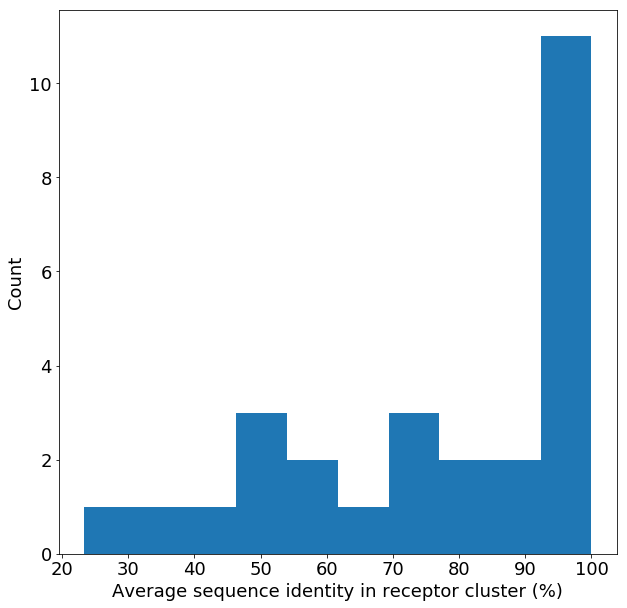

In [24]:
print(np.mean(AverageSeqIden))
plt.hist(np.array(AverageSeqIden)*100)
plt.xlabel("Average sequence identity in receptor cluster (%)", fontsize=18 )
plt.ylabel("Count", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [25]:
print(np.mean(AverageSeqIden),np.median(AverageSeqIden),np.min(AverageSeqIden),np.max(AverageSeqIden))

(0.7662003748030527, 0.83999999999999997, 0.23333333333333331, 1.0)


Full


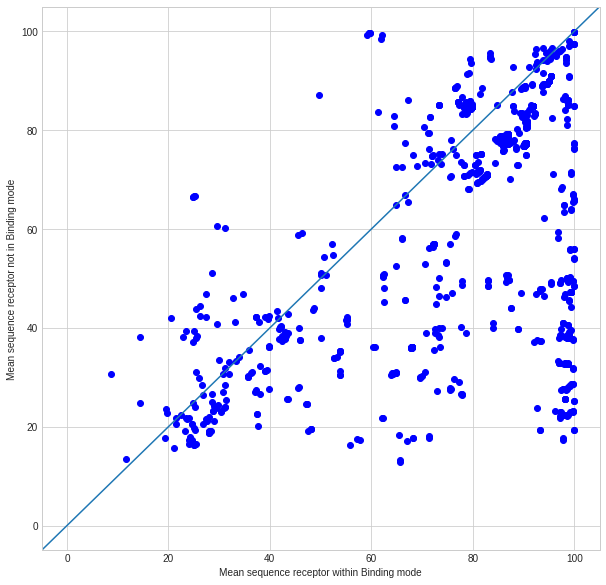

('Average seq iden in and out', 0.79601149051518771, 0.55502697796048228, 37)


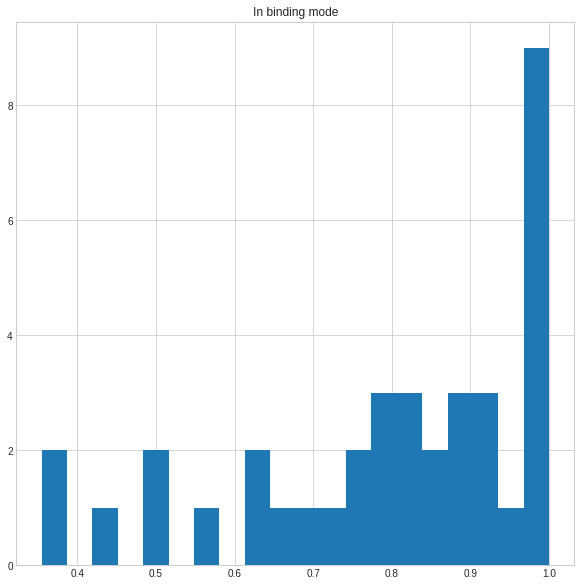

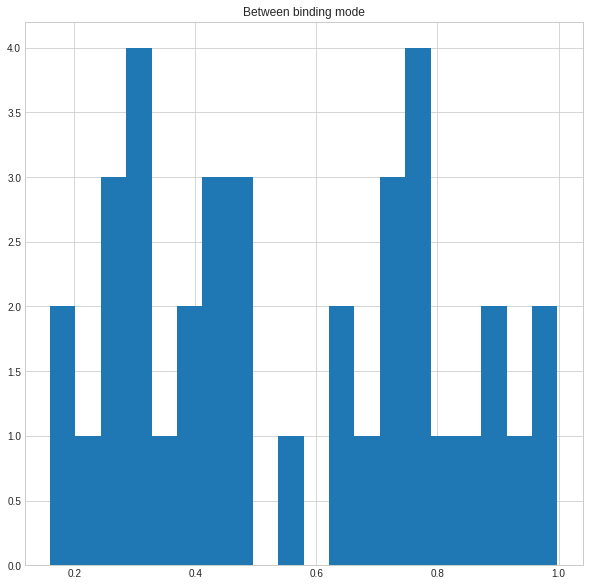

('Median seq iden in and out', 0.83679882975084041, 0.47594043593044666, 37)
('Max and min seq iden ', 0.35447753167168472, 1.0, 37)


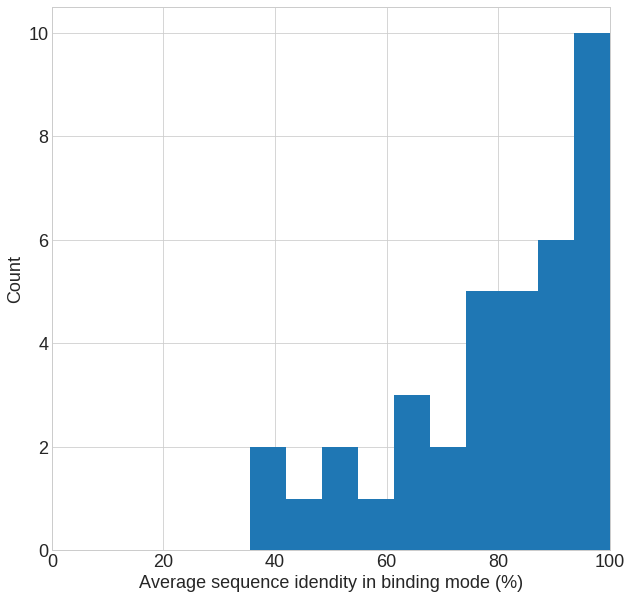

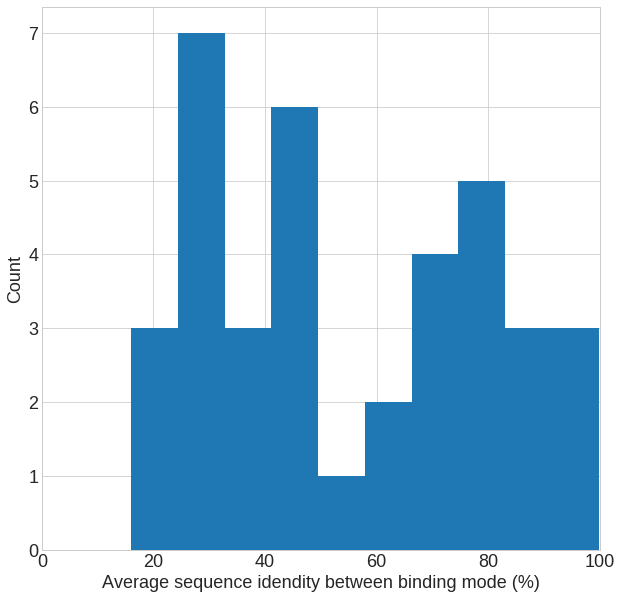

In [26]:
#Is there a link between CATHdb and Binding mode
mpl.style.use('seaborn-whitegrid')
for ikl in range(0,2):
    torun = PixelDB
    if ikl == 1:
        print("ECR")
        torun = PixelDBecr
    else:
        print("Full")
    inbm = []
    outbm = []
    for uniid in list(np.unique(torun["cluster_number"])):
        sdf = torun[torun["cluster_number"] == uniid]
        sdf = sdf[sdf["mean_seq_iden_in_bm"] > 0]
        sdf = sdf[sdf["mean_seq_iden_not_bm"] > 0]
        
        
        
        if (len(sdf) == 0):
            continue
            
        #die
        if (len(sdf["unique_id"].value_counts()) == 1):
            continue
        plt.scatter(sdf["mean_seq_iden_in_bm"]*100,sdf["mean_seq_iden_not_bm"]*100,c="blue")
        inbm.append(np.mean(sdf["mean_seq_iden_in_bm"]))
        outbm.append(np.mean(sdf["mean_seq_iden_not_bm"]))
        #print(inbm[-1],uniid)
        #if uniid == 7:
        #    die
        
    plt.xlabel("Mean sequence receptor within Binding mode")
    plt.ylabel("Mean sequence receptor not in Binding mode")
    plt.plot([-5,105],[-5,105])
    plt.xlim((-5,105))
    plt.ylim((-5,105))
    plt.show()
    #break
    print("Average seq iden in and out",np.mean(inbm),np.mean(outbm),len(inbm))
    plt.hist(inbm,20)
    plt.title("In binding mode")
    plt.show()
    plt.hist(outbm,20)
    plt.title("Between binding mode")
    plt.show()
    print("Median seq iden in and out",np.median(inbm),np.median(outbm),len(inbm))
    print("Max and min seq iden ",np.min(inbm),np.max(inbm),len(inbm))
    
    figsize(10,10)
    plt.hist(np.array(inbm)*100)
    plt.xlim([0,100])
    plt.xlabel("Average sequence idendity in binding mode (%)", fontsize=18 )
    plt.ylabel("Count", fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()
    
    plt.hist(np.array(outbm)*100)
    plt.xlim([0,100])
    plt.xlabel("Average sequence idendity between binding mode (%)", fontsize=18 )
    plt.ylabel("Count", fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()
    
    break

  

In [27]:
#Sequence iden in binding mode
allbm = PixelDB.groupby(by="unique_id").mean()["mean_seq_iden_in_bm"]
allbm = allbm[allbm > 0]
#print(allbm)
print(np.mean(allbm),np.median(allbm),np.min(allbm),np.max(allbm))

(0.829998207474418, 0.95381062355658208, 0.14457831325301201, 1.0)


In [28]:
allCarac = ["resolution","receptor_length","peptide_length","size_of_binding_mode","longest_continuous_core","longest_continuous_ecr"]

for v in allCarac:
    AllMean = []
    for uniid in list(np.unique(PixelDB["unique_id"])):
        sdf = PixelDB[PixelDB["unique_id"] == uniid]
        AllMean.append(np.mean(sdf[v]))
    print("%s Avg:%6.2f Std:%6.2f Median:%6.2f Min:%6.2f Max:%7.2f" % (v,np.mean(AllMean),np.std(AllMean),np.median(AllMean),np.min(PixelDB[v]),np.max(PixelDB[v])))

resolution Avg:  2.03 Std:  0.29 Median:  2.03 Min:  0.91 Max:   2.50
receptor_length Avg:317.16 Std:205.92 Median:265.83 Min: 36.00 Max:1360.00
peptide_length Avg: 14.07 Std:  9.51 Median: 11.00 Min:  5.00 Max:  50.00
size_of_binding_mode Avg:  2.70 Std:  8.11 Median:  1.00 Min:  1.00 Max: 171.00
longest_continuous_core Avg: 12.94 Std:  9.52 Median: 10.00 Min:  3.00 Max:  50.00
longest_continuous_ecr Avg:  0.86 Std:  1.85 Median:  0.00 Min:  0.00 Max:  35.00


In [29]:
#Is there a link between CATHdb and Binding mode

for ikl in range(0,2):
    torun = PixelDB
    if ikl == 1:
        print("ECR")
        torun = PixelDBecr
    else:
        print("Full")

    
    
    

    for test in ["PFAM","uniprot","CATH"]:
        CATHdbOver = []
        BindingMode = []
        for uniid in list(np.unique(torun["cluster_number"])):
            sdf = torun[torun["cluster_number"] == uniid]



            BindingMode.append(len(sdf["unique_id"].value_counts()))
            if (len(sdf["unique_id"].value_counts()) == 1):
                continue
            AllCATH = []



            AllCATHUni = []
            for unid in np.unique(sdf["unique_id"]):

                CATHuni = []
                for cid in sdf[sdf["unique_id"] == unid][test]:
                    #print(cid.split("_"))
                    if str(cid) != "nan":
                        CATHuni += cid.split("_")
                        AllCATHUni += cid.split("_")

                AllCATH.append(list(set(CATHuni)))

            Tot = 0
            Over = 0

            for i in range(0,len(AllCATH)):
                for j in range(i+1,len(AllCATH)):
                    OverT = 0
                    for v in AllCATH[i]:
                        if v in AllCATH[j]:
                            OverT += 1
                    if (OverT != 0):
                        Over += 1
                    #else:
                    #    print(i,j,AllCATH[i],AllCATH[j])
                    Tot += 1
            CATHdbOver.append(float(Over)/float(Tot))
            #if (CATHdbOver[-1] < 0.5):
            #    print(uniid,Over,Tot)
            #    print(AllCATH)



            #if len(sdf["unique_id"].value_counts()) > 6:
            #    print(uniid,len(sdf["unique_id"].value_counts()))
            #    print(pd.Series(AllCATHUni).value_counts())
            #else:
            #    break


            #break
            #          
            #break
        print(len(CATHdbOver))
        print("Average Overlap of:",test,np.mean(CATHdbOver))
        print("Median Overlap of:",test,np.median(CATHdbOver))
        print("Average Nb of Binding mode:",np.mean(BindingMode))
        print("Median Nb of Binding mode:",np.median(BindingMode))
        print(np.min(BindingMode),np.max(BindingMode))
        
        print("More than one binding mode",np.sum(np.array(BindingMode)  > 1))
        print("Total cluster",len(BindingMode))
        
        print()
    break

Full
93
('Average Overlap of:', 'PFAM', 0.66711406872697199)
('Median Overlap of:', 'PFAM', 1.0)
('Average Nb of Binding mode:', 1.4979423868312758)
('Median Nb of Binding mode:', 1.0)
(1, 45)
('More than one binding mode', 93)
('Total cluster', 486)
()
93
('Average Overlap of:', 'uniprot', 0.43544209673241935)
('Median Overlap of:', 'uniprot', 0.33333333333333331)
('Average Nb of Binding mode:', 1.4979423868312758)
('Median Nb of Binding mode:', 1.0)
(1, 45)
('More than one binding mode', 93)
('Total cluster', 486)
()
93
('Average Overlap of:', 'CATH', 0.97401433691756278)
('Median Overlap of:', 'CATH', 1.0)
('Average Nb of Binding mode:', 1.4979423868312758)
('Median Nb of Binding mode:', 1.0)
(1, 45)
('More than one binding mode', 93)
('Total cluster', 486)
()


In [30]:
AllArrang = dict()
torun = NoDual
for v in np.array(torun["core_ecr_alignment"]):
    vinit = v
    v = v.replace("-","")
    for i in range(0,len(v)):
        vi = v
        v = re.sub('D', "E", v)
        v = re.sub('d', "e", v)
        v = re.sub('C+', "C", v)
        v = re.sub('E+', "E", v)
        v = re.sub('e+', "e", v)
        v = re.sub('c+', "c", v)
        if v == vi:
            break
    if v not in AllArrang:
        AllArrang[v] = 0
    AllArrang[v] += 1
    #print(vinit,v)
Sum = 0
Terminal = 0
for w in sorted(AllArrang, key=AllArrang.get, reverse=True):
    print w, AllArrang[w]
    if (re.search("^E",w)) or (re.search("E$",w)):
        Terminal += AllArrang[w]
    Sum += AllArrang[w]
print(Terminal,Sum,float(Terminal)/float(Sum))

eCE 45
EC 22
ECe 21
CE 13
ECE 8
eCeCE 3
eCEC 2
eCECe 2
ECeCe 2
eCEcE 1
CEC 1
CECe 1
ECeC 1
ECEce 1
(117, 123, 0.9512195121951219)


In [31]:
AllMeanData = dict()

LegendLabel = ["Solvent Exposure [0-9]","Levy Classification","Stride Classifcation","Bfactors", "Amino Acid compostion"]
ToTest = ["percent_exposed_alignment","levy_alignment","stride","bfact","sequence_alignment"]

#LegendLabel = ["Solvent Exposure [0-9]","Stride Classifcation"]
#ToTest = ["percent_exposed_alignment","stride"]

dftorun = NoDual
for (alin,LL) in zip(ToTest,LegendLabel):
    if alin not in list(dftorun.columns.values):
        continue
    AllMeanData[LL] = dict()
    print(alin)
    
    AllECR = dict()
    AllCore = dict()
    
    
    SumCore = 0.0
    SumECR = 0.0
    
    #Find Label
    Label = []
    for v in dftorun[alin]:
        for i in range(0,len(v)):
            if v[i] == "-":
                continue
            Label.append(v[i])
    Label = sorted(list(set(Label)))
    if alin == "sequence_alignment":
        Label = myAmino
    
    df = pd.DataFrame()
    
    print(alin,Label)
    count = 0
    for uniid in list(np.unique(dftorun["unique_id"])):
        
        Tecr = dict()
        Tcore = dict()
        Totecr = 0.0
        Totcore = 0.0
        
        sdf = dftorun[dftorun["unique_id"] == uniid]
        
        for (ecr,ali,lecr) in zip(np.array(sdf["core_ecr_alignment"]),np.array(sdf[alin]),np.array(sdf["longest_continuous_ecr"])):
            
            if lecr < 4:
                continue
            if (len(ecr) != len(ali)):
                print(uniid)
                print(ecr,ali,lecr)
                continue
            for i in range(0,len(ecr)):
                if ecr[i] == "E":
                    if ali[i] not in Tecr:
                        Tecr[ali[i]] = 0.0
                    Tecr[ali[i]] += 1.0
                    Totecr += 1.0
                    SumECR += 1.0
                    
                if ecr[i] == "C":
                    if ali[i] not in Tcore:
                        Tcore[ali[i]] = 0.0
                    Tcore[ali[i]] += 1.0
                    Totcore += 1.0
                    SumCore += 1.0
        if (float(Totecr) == 0):
            continue
        for aa in Label:
            if aa not in Tecr:
                Tecr[aa] = 0.0
            if aa not in AllECR:
                AllECR[aa] = []
            
            AllECR[aa].append(Tecr[aa] / float(Totecr))

            if aa not in Tcore:
                Tcore[aa] = 0.0
            if aa not in AllCore:
                AllCore[aa] = []
            AllCore[aa].append(Tcore[aa] / float(Totcore))
            count += 1
    print(SumCore,SumECR)
    ECRMean = []
    CoreMean = []
    
    (BtCore,BtECR) = bootstrap(AllCore,AllECR,it=10000)
    
    
    for aa in Label:
        ECRMean.append(np.mean(BtECR[aa]))
        CoreMean.append(np.mean(BtCore[aa]))
        
        
    for i in range(0,len(Label)):
        ttest = stats.ttest_rel(BtECR[Label[i]], BtCore[Label[i]])[1]
        print("%2d %2s P.val=%10.8f Core:%6.2f ECR:%6.2f" % (i,Label[i],ttest,CoreMean[i],ECRMean[i]))
        #print(i,Label[i],ttest,"CORE:%4.2f " % (CoreMean[i]),"ECR",ECRMean[i])
        if Label[i] not in AllMeanData[LL]:
            AllMeanData[LL][Label[i]] = dict()
        AllMeanData[LL][Label[i]]["ECR"] = [ECRMean[i],np.std(BtECR[Label[i]]) ]
        AllMeanData[LL][Label[i]]["Core"] = [CoreMean[i],np.std(BtCore[Label[i]])]
        


percent_exposed_alignment
('percent_exposed_alignment', ['0', '1', '2', '3', '4', '5', '6'])
(1407.0, 883.0)
 0  0 P.val=0.00000000 Core: 58.94 ECR: 26.37
 1  1 P.val=0.00000000 Core: 22.20 ECR: 21.09
 2  2 P.val=0.00000000 Core: 11.22 ECR: 18.60
 3  3 P.val=0.00000000 Core:  6.21 ECR: 24.94
 4  4 P.val=0.00000000 Core:  1.43 ECR:  2.97
 5  5 P.val=0.00000000 Core:  0.00 ECR:  1.30
 6  6 P.val=0.00000000 Core:  0.00 ECR:  4.75
stride
('stride', ['B', 'C', 'E', 'G', 'H', 'T', 'b'])
(1407.0, 883.0)
 0  B P.val=0.00000000 Core:  0.00 ECR:  2.79
 1  C P.val=0.00000000 Core: 28.73 ECR: 48.43
 2  E P.val=0.00000000 Core:  9.77 ECR:  1.23
 3  G P.val=0.00000000 Core:  9.29 ECR:  2.85
 4  H P.val=0.00000000 Core: 27.44 ECR: 21.67
 5  T P.val=0.00000000 Core: 24.77 ECR: 23.03
 6  b P.val=       nan Core:  0.00 ECR:  0.00
bfact
('bfact', ['1', '2', '3', '4', '5', '6', '7', '8', '9'])
8_1
('------------e-------------------------------------CCCCC-EEEE---', '----------------------------------------

In [32]:
AllECR = dict()
AllCore = dict()
AllSurf = dict()
AllInte = dict()


SumCore = 0.0
SumECR = 0.0
SumSurf = 0.0
SumInte = 0.0

for aa in myAmino:
    AllECR[aa] = []
    AllCore[aa] = []
    AllSurf[aa] = []
    AllInte[aa] = []
Label = myAmino
for uniid in list(np.unique(dftorun["unique_id"])):
    sdf = dftorun[dftorun["unique_id"] == uniid]
    Tecr = dict()
    Tcore = dict()
    Tsurf = dict()
    Tinte = dict()
    Totecr = 0.0
    Totcore = 0.0
    Totsurf = 0.0
    Totinte = 0.0
    for v in sdf["EXOSITE_aa"]:
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tecr:
                Tecr[sp[0]] = 0
            Tecr[sp[0]] += float(sp[1])
            Totecr += float(sp[1])
            SumECR += float(sp[1])
    for v in sdf["surface_aa"]:
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tsurf:
                Tsurf[sp[0]] = 0
            Tsurf[sp[0]] += float(sp[1])
            Totsurf += float(sp[1])
            SumSurf += float(sp[1])
    for v in sdf["interior_aa"]:
        
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tinte:
                Tinte[sp[0]] = 0
            Tinte[sp[0]] += float(sp[1])
            Totinte += float(sp[1])
            SumInte += float(sp[1])
            
    for v in sdf["COREBINDING_aa"]:
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tcore:
                Tcore[sp[0]] = 0
            Tcore[sp[0]] += float(sp[1])
            Totcore += float(sp[1])
            SumCore += float(sp[1])        
    
    Label = myAmino
    for aa in Label:
        if aa not in Tecr:
            Tecr[aa] = 0.0
        #print(aa,Tecr[aa],Totecr)
        if aa not in AllECR:
            AllECR[aa] = []
        if (Totecr != 0):
            AllECR[aa].append(Tecr[aa] / float(Totecr))
        else:
            AllECR[aa].append(0)

        if aa not in Tcore:
            Tcore[aa] = 0.0
        if aa not in AllCore:
            AllCore[aa] = []
        if Totcore != 0:
            AllCore[aa].append(Tcore[aa] / float(Totcore))
        else:
            AllCore[aa].append(0)
            
            
        if aa not in Tsurf:
            Tsurf[aa] = 0.0
        if aa not in AllSurf:
            AllSurf[aa] = []
        if Totsurf != 0:
            AllSurf[aa].append(Tsurf[aa] / float(Totsurf))
        else:
            AllSurf[aa].append(0)
            
        if aa not in Tinte:
            Tinte[aa] = 0.0
        if aa not in AllInte:
            AllInte[aa] = []
        if Totinte != 0:
            AllInte[aa].append(Tinte[aa] / float(Totinte))
        else:
            AllInte[aa].append(0)
ECRMean = []
CoreMean = []
SurfMean = []
InteMean = []

(BtCore,BtECR) = bootstrap(AllCore,AllECR,it=10000)

(BtInte,BtSurf) = bootstrap(AllInte,AllSurf,it=10000)

Label = myAmino
for aa in Label:
    ECRMean.append(np.mean(BtECR[aa]))
    CoreMean.append(np.mean(BtCore[aa]))
    SurfMean.append(np.mean(BtSurf[aa]))
    InteMean.append(np.mean(BtInte[aa]))

In [33]:
print(SumCore,SumECR,SumSurf,SumInte)

(2883.0, 643.0, 6365.0, 27529.0)


In [34]:

Color = ["red"]*3+["blue"]*2+["purple"]*4+["black"]*3+["green"]*5+["yellow"]*3

LL= "Binding Site"
AllMeanData[LL] = dict()


for i in range(0,len(Label)):
    ttest = stats.ttest_rel(BtSurf[Label[i]], BtCore[Label[i]])[1]
    print("%2d %2s P.val=%10.8f Core:%4.2f ECR:%4.2f Surf:%4.2f Inte:%.2f" % (i,Label[i],ttest,CoreMean[i],ECRMean[i],SurfMean[i],InteMean[i]))
    if Label[i] not in AllMeanData[LL]:
        AllMeanData[LL][Label[i]] = dict()
    AllMeanData[LL][Label[i]]["ECR"] = [ECRMean[i],np.std(BtECR[Label[i]]) ]
    AllMeanData[LL][Label[i]]["Core"] = [CoreMean[i],np.std(BtCore[Label[i]])]    
    AllMeanData[LL][Label[i]]["Surf"] = [SurfMean[i],np.std(BtSurf[Label[i]])]
    AllMeanData[LL][Label[i]]["Inte"] = [InteMean[i],np.std(BtInte[Label[i]])]
        


 0  R P.val=0.00000000 Core:7.03 ECR:9.78 Surf:6.91 Inte:3.52
 1  H P.val=0.00000000 Core:1.96 ECR:5.74 Surf:2.08 Inte:2.17
 2  K P.val=0.00000000 Core:6.81 ECR:14.75 Surf:16.84 Inte:4.23
 3  D P.val=0.00000000 Core:6.79 ECR:12.54 Surf:10.89 Inte:6.18
 4  E P.val=0.00000000 Core:7.27 ECR:5.06 Surf:11.88 Inte:5.23
 5  S P.val=0.00000000 Core:6.30 ECR:5.81 Surf:7.32 Inte:6.11
 6  T P.val=0.00000000 Core:3.68 ECR:0.36 Surf:4.68 Inte:5.54
 7  N P.val=0.00000000 Core:6.17 ECR:3.93 Surf:5.66 Inte:4.64
 8  Q P.val=0.00000000 Core:2.48 ECR:1.37 Surf:4.89 Inte:3.81
 9  C P.val=0.00000000 Core:2.09 ECR:0.52 Surf:0.46 Inte:2.41
10  G P.val=0.00000000 Core:3.58 ECR:5.90 Surf:7.20 Inte:6.46
11  P P.val=0.00000000 Core:3.75 ECR:4.60 Surf:7.36 Inte:3.55
12  A P.val=0.00000000 Core:4.51 ECR:4.29 Surf:4.70 Inte:7.45
13  V P.val=0.00000000 Core:5.90 ECR:2.81 Surf:1.72 Inte:7.75
14  I P.val=0.00000000 Core:5.84 ECR:4.89 Surf:0.59 Inte:7.21
15  L P.val=0.00000000 Core:9.26 ECR:6.08 Surf:2.24 Inte:11.44
16

In [35]:
AllECR = dict()
AllCore = dict()
AllSurf = dict()
AllInte = dict()


SumCore = 0.0
SumECR = 0.0
SumSurf = 0.0
SumInte = 0.0

for aa in myAmino:
    AllECR[aa] = []
    AllCore[aa] = []
    AllSurf[aa] = []
    AllInte[aa] = []
Label = ['B', 'C', 'E', 'G', 'H', 'T', 'b']
for uniid in list(np.unique(dftorun["unique_id"])):
    sdf = dftorun[dftorun["unique_id"] == uniid]
    Tecr = dict()
    Tcore = dict()
    Tsurf = dict()
    Tinte = dict()
    Totecr = 0.0
    Totcore = 0.0
    Totsurf = 0.0
    Totinte = 0.0
    for v in sdf["EXOSITE_ss"]:
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tecr:
                Tecr[sp[0]] = 0
            Tecr[sp[0]] += float(sp[1])
            Totecr += float(sp[1])
            SumECR += float(sp[1])
    for v in sdf["surface_ss"]:
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tsurf:
                Tsurf[sp[0]] = 0
            Tsurf[sp[0]] += float(sp[1])
            Totsurf += float(sp[1])
            SumSurf += float(sp[1])
    for v in sdf["interior_ss"]:
        
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tinte:
                Tinte[sp[0]] = 0
            Tinte[sp[0]] += float(sp[1])
            Totinte += float(sp[1])
            SumInte += float(sp[1])
            
    for v in sdf["COREBINDING_ss"]:
        for aa in v.split(";"):
            sp = aa.split(":")
            if sp[0] not in Tcore:
                Tcore[sp[0]] = 0
            Tcore[sp[0]] += float(sp[1])
            Totcore += float(sp[1])
            SumCore += float(sp[1])        
    
    for aa in Label:
        if aa not in Tecr:
            Tecr[aa] = 0.0
        #print(aa,Tecr[aa],Totecr)
        if aa not in AllECR:
            AllECR[aa] = []
        if (Totecr != 0):
            AllECR[aa].append(Tecr[aa] / float(Totecr))
        else:
            AllECR[aa].append(0)

        if aa not in Tcore:
            Tcore[aa] = 0.0
        if aa not in AllCore:
            AllCore[aa] = []
        if Totcore != 0:
            AllCore[aa].append(Tcore[aa] / float(Totcore))
        else:
            AllCore[aa].append(0)
            
            
        if aa not in Tsurf:
            Tsurf[aa] = 0.0
        if aa not in AllSurf:
            AllSurf[aa] = []
        if Totsurf != 0:
            AllSurf[aa].append(Tsurf[aa] / float(Totsurf))
        else:
            AllSurf[aa].append(0)
            
        if aa not in Tinte:
            Tinte[aa] = 0.0
        if aa not in AllInte:
            AllInte[aa] = []
        if Totinte != 0:
            AllInte[aa].append(Tinte[aa] / float(Totinte))
        else:
            AllInte[aa].append(0)
ECRMean = []
CoreMean = []
SurfMean = []
InteMean = []

(BtCore,BtECR) = bootstrap(AllCore,AllECR,it=10000)

(BtInte,BtSurf) = bootstrap(AllInte,AllSurf,it=10000)

for aa in Label:
    ECRMean.append(np.mean(BtECR[aa]))
    CoreMean.append(np.mean(BtCore[aa]))
    SurfMean.append(np.mean(BtSurf[aa]))
    InteMean.append(np.mean(BtInte[aa]))

In [36]:

Color = ["red"]*3+["blue"]*2+["purple"]*4+["black"]*3+["green"]*5+["yellow"]*3

LL= "Binding Site SS"
AllMeanData[LL] = dict()


for i in range(0,len(Label)):
    ttest = stats.ttest_rel(BtSurf[Label[i]], BtCore[Label[i]])[1]
    print("%2d %2s P.val=%10.8f Core:%4.2f ECR:%4.2f Surf:%4.2f Inte:%.2f" % (i,Label[i],ttest,CoreMean[i],ECRMean[i],SurfMean[i],InteMean[i]))
    if Label[i] not in AllMeanData[LL]:
        AllMeanData[LL][Label[i]] = dict()
    AllMeanData[LL][Label[i]]["ECR"] = [ECRMean[i],np.std(BtECR[Label[i]]) ]
    AllMeanData[LL][Label[i]]["Core"] = [CoreMean[i],np.std(BtCore[Label[i]])]    
    AllMeanData[LL][Label[i]]["Surf"] = [SurfMean[i],np.std(BtSurf[Label[i]])]
    AllMeanData[LL][Label[i]]["Inte"] = [InteMean[i],np.std(BtInte[Label[i]])]
        


 0  B P.val=0.00000000 Core:1.78 ECR:0.81 Surf:0.53 Inte:1.44
 1  C P.val=0.00000000 Core:16.80 ECR:17.26 Surf:25.30 Inte:15.11
 2  E P.val=0.00000000 Core:24.85 ECR:16.22 Surf:4.92 Inte:22.32
 3  G P.val=0.00000000 Core:3.74 ECR:5.03 Surf:6.06 Inte:3.65
 4  H P.val=0.00000000 Core:36.38 ECR:33.21 Surf:29.20 Inte:41.25
 5  T P.val=0.00000000 Core:16.44 ECR:27.48 Surf:33.99 Inte:16.20
 6  b P.val=       nan Core:0.00 ECR:0.00 Surf:0.00 Inte:0.03


In [37]:
mpl.style.use('seaborn-whitegrid')

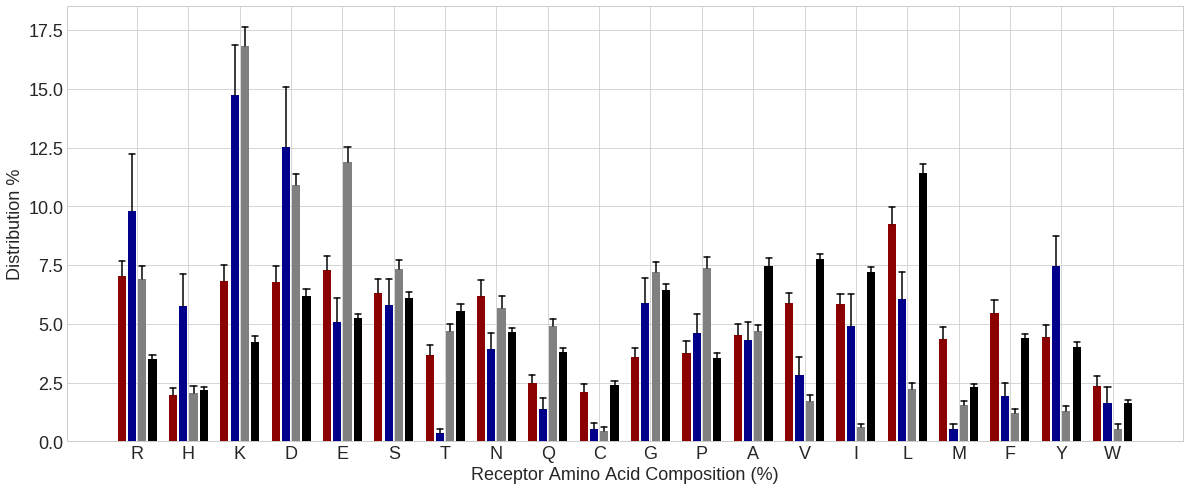

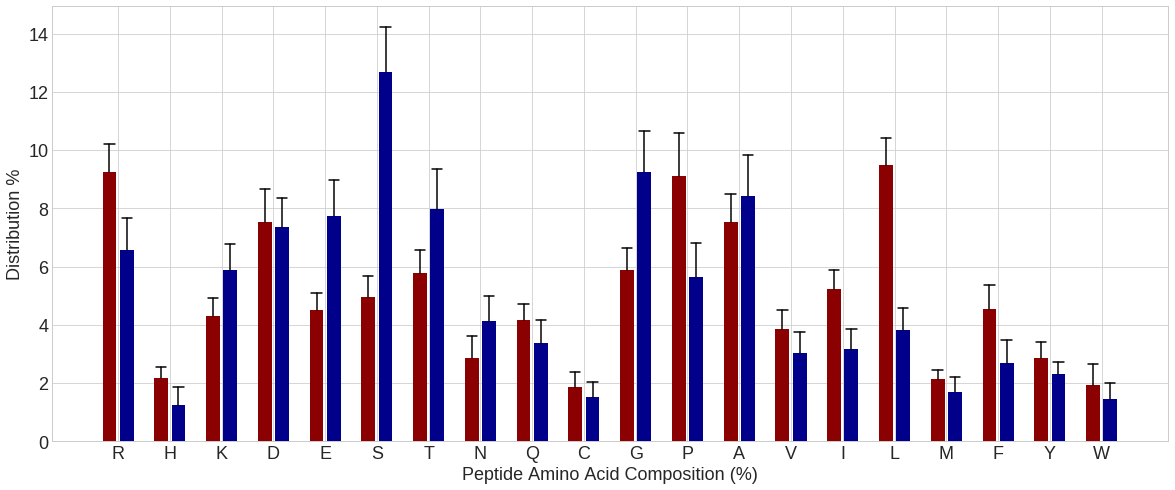

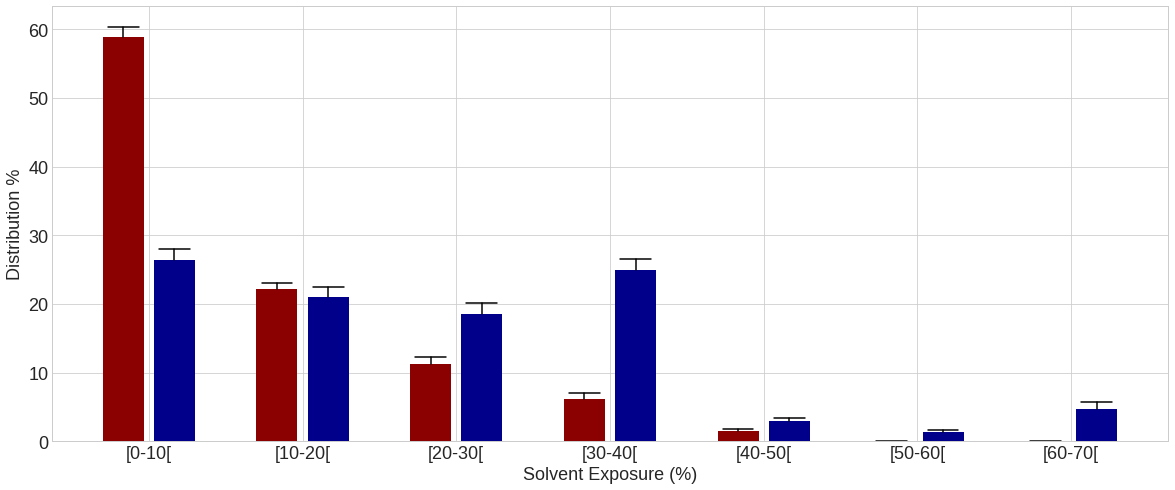

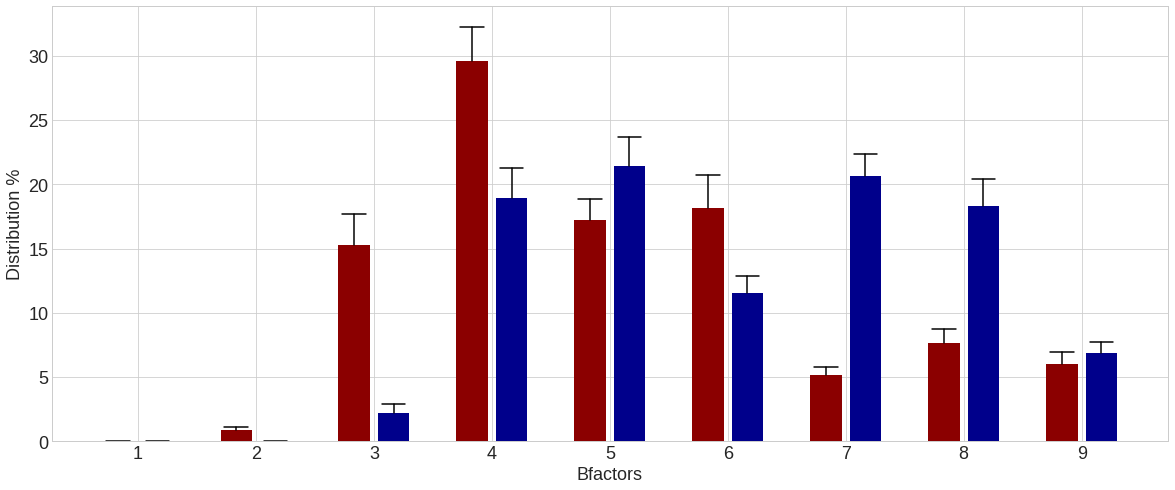

In [38]:
figsize(20,8)
Test = ["Binding Site","Amino Acid compostion","Solvent Exposure [0-9]","Bfactors"]
Label = ["Receptor Amino Acid Composition (%)","Peptide Amino Acid Composition (%)","Solvent Exposure (%)"]
Label += ["Bfactors"]
Order = ["Core","ECR","Surf","Inte"]
Col = ["darkred","darkblue","gray","black"]
Color = ["red"]*3+["blue"]*2+["purple"]*4+["black"]*3+["green"]*5+["yellow"]*3
pos = 0.0
for (test,lab) in zip(Test,Label):
    pos = 0.0
    pos += 1.0
    
    sub = AllMeanData[test]
    #print(len(sub))
    Tlab = sorted(sub)
    if len(Tlab) == 20:
        Tlab = myAmino
    Xlabpos = []
    
    for t in Tlab:
        Tpos = []
        
        for o in Order:
            if o not in sub[t]:
                continue
            plt.bar([pos],sub[t][o][0],color=Col[Order.index(o)])
            plt.plot([pos,pos],[sub[t][o][0],sub[t][o][0]+sub[t][o][1]],color="black")
            
            plt.plot([pos-0.3,pos+0.3],[sub[t][o][0]+sub[t][o][1]]*2,color="black")
            
            Tpos.append(pos)
            pos += 1.0
        Xlabpos.append(np.mean(Tpos))
        pos += 1
        #print(t)
    #break
    if test == "Solvent Exposure [0-9]":
        Tlab = ["[0-10[","[10-20[","[20-30[","[30-40[","[40-50[","[50-60[","[60-70["]
        
    plt.xticks(Xlabpos, Tlab)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel(lab,size=18)
    plt.ylabel("Distribution %",rotation=90,size=18)
    plt.show()
    #break

In [39]:
#Amino acid composition
AllAAComb = dict()
sub = AllMeanData["Binding Site"]

for aa in sub:
    if aa not in AllAAComb:
        AllAAComb[aa] = dict()
    for t in sub[aa]:
        ti = t
        if t == "Core":
            ti = "Core-binding"
        if t == "ECR":
            ti = "Exosite"
        if t == "Inte":
            ti = "Interior"
        if t == "Surf":
            ti = "NISR"
        AllAAComb[aa][ti] = sub[aa][t][0]
sub = AllMeanData["Amino Acid compostion"]

for aa in sub:
    if aa not in AllAAComb:
        AllAAComb[aa] = dict()
    for t in sub[aa]:
        AllAAComb[aa][t] = sub[aa][t][0]
df = pd.DataFrame(AllAAComb)[myAmino].transpose()[["Core","ECR","Core-binding","Exosite","NISR","Interior"]]

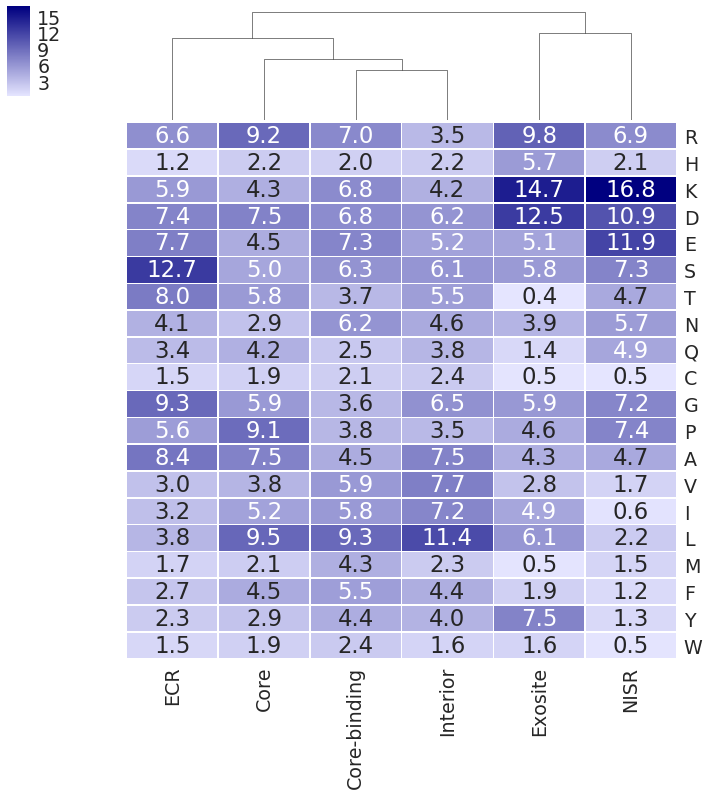

In [40]:
LabelOr = ["Core","ECR","Core-binding","Exosite","NISR","Interior"]
colcol = ["red","blue"]+["gray"]*4
sns.set(font_scale=1.9)
#sns.clustermap(df,row_cluster=False,row_colors = Color,col_colors=colcol)
pal = sns.light_palette("navy", as_cmap=True)
g = sns.clustermap(df,row_cluster=False,cmap=pal,figsize=(12,12),linewidths=.5,annot=True,metric="euclidean", fmt=".1f")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

('A', 832.6451791036766)
('C', 178.17560840821437)
('E', 675.4185753338089)
('D', 576.7838118131014)
('G', 633.2075325185194)
('F', 408.83306070484673)
('I', 502.12690511570764)
('H', 240.5695599068136)
('K', 646.4584034922898)
('M', 216.8457243848058)
('L', 929.3434205450797)
('N', 361.17071478610904)
('Q', 437.89707213817405)
('P', 692.9593980273368)
('S', 677.7101208601403)
('R', 669.9644634710219)
('T', 531.0748352508583)
('W', 165.50795810881294)
('V', 541.4329639225155)
('Y', 323.336182184187)
All


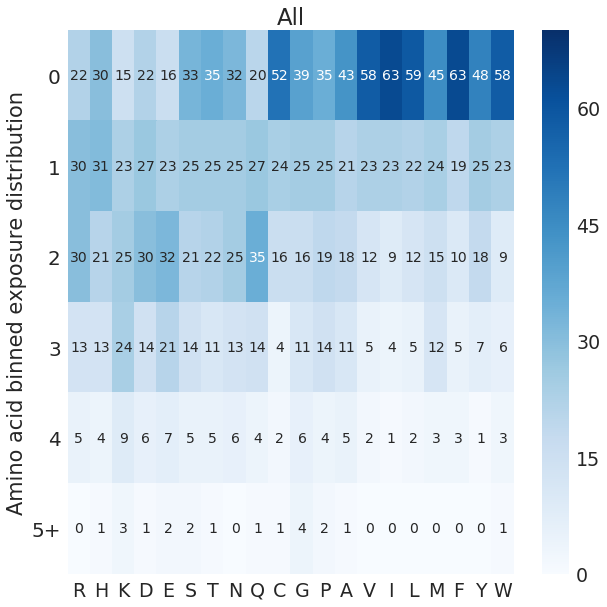

('A', 31.446726209806698)
('C', 6.156909430438842)
('E', 23.328876678876682)
('D', 24.136984970653696)
('G', 16.30685480670002)
('F', 15.620085470085474)
('I', 22.192845020476593)
('H', 7.103181029496819)
('K', 28.49536019536019)
('M', 10.634829059829059)
('L', 34.49239583945462)
('N', 16.349145299145306)
('Q', 19.906477732793526)
('P', 25.18392408245348)
('S', 24.538161838161837)
('R', 34.72219677467354)
('T', 21.727845254161046)
('W', 5.577350427350428)
('V', 20.080891330891333)
('Y', 7.844444444444445)
Core


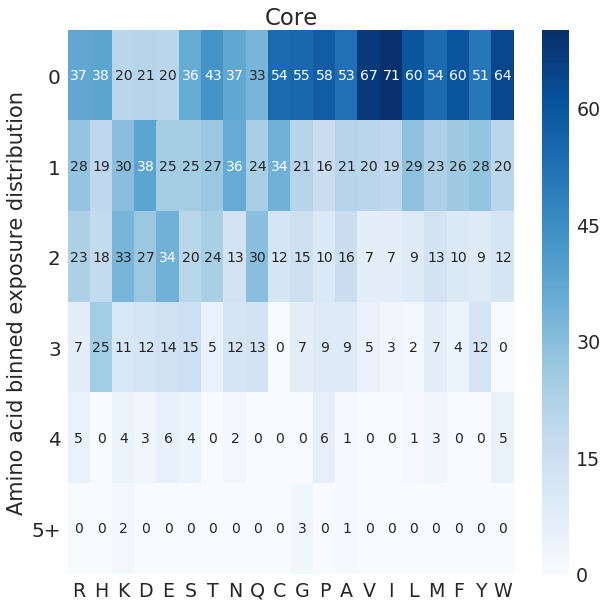

('A', 19.864920004316296)
('C', 3.5374400109694233)
('E', 19.092756589815416)
('D', 14.636350964137343)
('G', 20.810325682229713)
('F', 5.192320261437909)
('I', 10.123190328763084)
('H', 3.7526315789473683)
('K', 15.837827858416098)
('M', 6.05982905982906)
('L', 22.128783308195082)
('N', 9.44090909090909)
('Q', 7.79454140630611)
('P', 13.343040293040294)
('S', 22.64111199258258)
('R', 11.422599296128709)
('T', 15.917898441427855)
('W', 2.227777777777778)
('V', 6.0919737125619475)
('Y', 6.468753142282554)
ECR


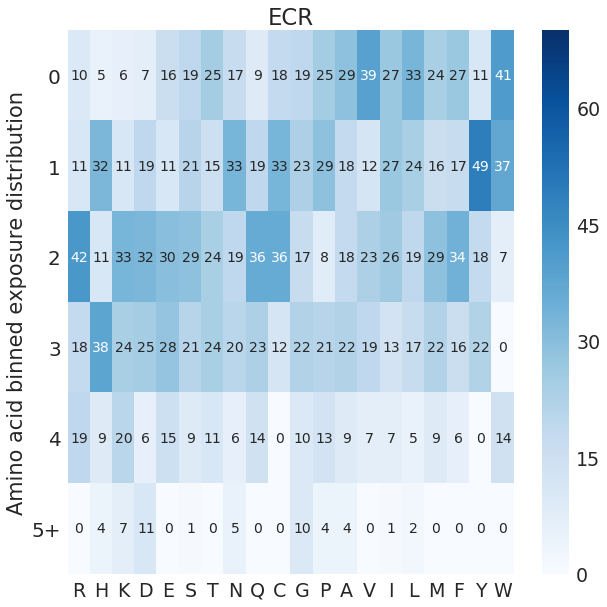

In [41]:
#Relationship between buried and aa type

AllDF = []
for (t,name) in zip(range(0,3),["All","Core","ECR"]):
    Count = dict()
    Tot = dict()
    for aa in myAmino:
        Count[aa] = dict()
        Tot[aa] = 0
        for i in range(0,9):
            Count[aa][str(i)] = 0
    torun = NoDual
    if t == 0:
        torun = PixelDB
    for (seq,bury,ecr,size) in zip(torun["sequence_alignment"],torun["percent_exposed_alignment"],torun["core_ecr_alignment"],torun["size_of_binding_mode"]):
        #print(seq,bury)
        for i in range(0,len(seq)):
            if seq[i] == "-":
                continue
            if t == 1:
                if ecr[i] == "E":
                    continue
            if t == 2:
                if ecr[i] == "C":
                    continue
            if seq[i] not in Count:
                Count[seq[i]] = dict()
            if bury[i] not in Count[seq[i]]:
                Count[seq[i]][bury[i]] = 0
            #print(i,seq[i],bury[i])
            Count[seq[i]][bury[i]] += 1.0/float(size)
            Tot[seq[i]] += 1/float(size)
        #break
    NormC = dict()
    for aa in Tot:
        NormC[aa] = dict()
        print(aa,Tot[aa])
        for b in Count[aa]:
            bt = b
            if int(bt) > 4:
                bt = "5+"
            if bt not in NormC[aa]:
                NormC[aa][bt] = 0
            
            NormC[aa][bt] += int(float(Count[aa][b]) / float(Tot[aa])*100.0+0.5)
    print(name)
    figsize(10,10)
    df = pd.DataFrame(NormC)
    df = df[myAmino]
    AllDF.append(df)
    g =  sns.heatmap(df[myAmino],vmax=70,annot=True,annot_kws={"size": 14},cmap="Blues")
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
    plt.title(name )
    plt.ylabel("Amino acid binned exposure distribution")
    plt.show()

Ttest_relResult(statistic=-0.14754239311679324, pvalue=0.88298158363969281)
('Core diff', 6.2980402394876078, 8.270829799242863, 3.5)
('ECR diff', 6.5184381159871352, 16.012519667173013, 2.833333333333333)


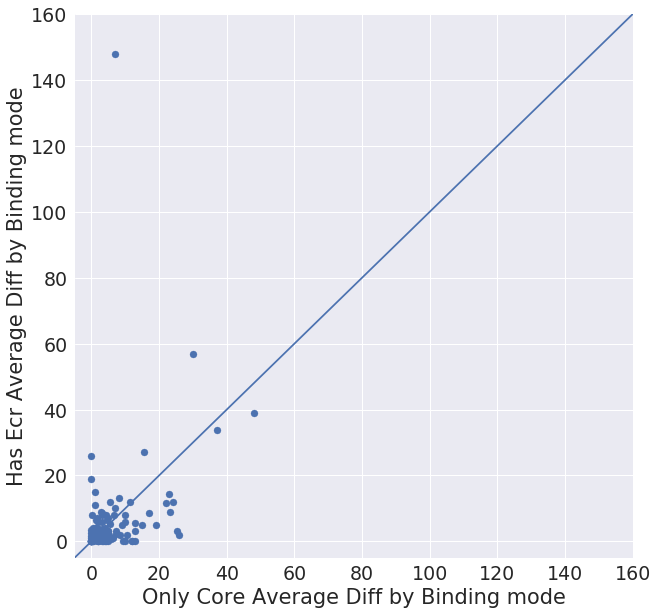

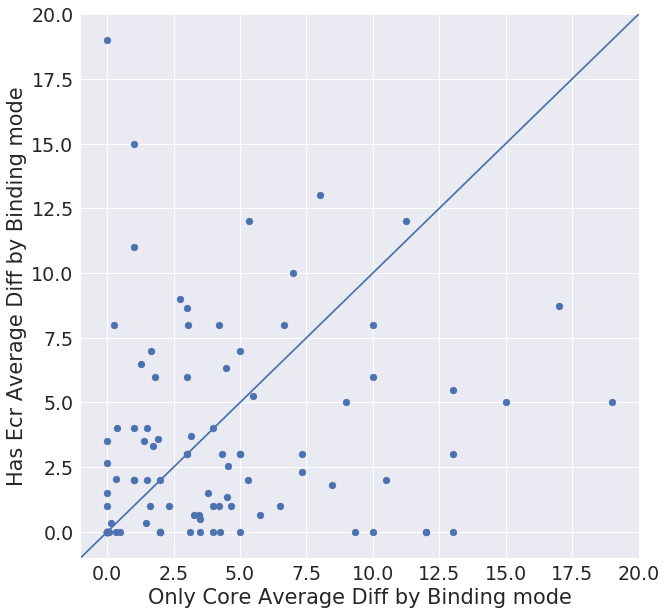

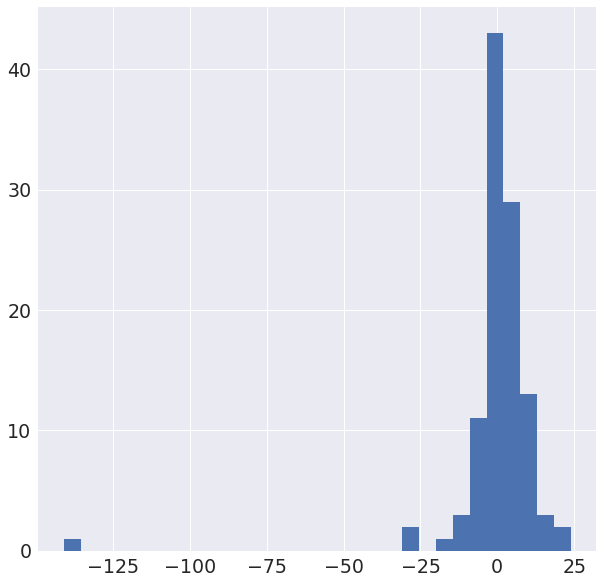

In [42]:
torun = PixelDBecr.copy(deep=True)
torun["full_peptide_sequece_len"] = torun["full_peptide_sequece"].str.len()
torun["has_ecr"] = torun["longest_continuous_ecr"] > 3
torun["diff"] = torun["full_peptide_sequece_len"]-torun["peptide_length"]
#torun.groupby(by=["unique_id","has_ecr"]).mean()["diff"]
bla = torun.groupby(by=["unique_id"]).filter(lambda x: len(x.has_ecr.unique()) > 1).groupby(by=["unique_id","has_ecr"]).mean()["diff"]

figsize(10,10)
onlycore = np.array(bla)[np.array(range(0,len(bla)/2))*2]
hasecr = np.array(bla)[np.array(range(0,len(bla)/2))*2+1]
print(stats.ttest_rel(onlycore,hasecr))
print("Core diff",np.mean(onlycore),np.std(onlycore),np.median(onlycore))
print("ECR diff",np.mean(hasecr),np.std(hasecr),np.median(hasecr))

plt.scatter(onlycore,hasecr)
plt.plot([-120,160],[-120,160])
plt.xlim([-5,160])
plt.ylim([-5,160])
plt.xlabel("Only Core Average Diff by Binding mode")
plt.ylabel("Has Ecr Average Diff by Binding mode")
plt.show()

plt.scatter(onlycore,hasecr)
plt.plot([-20,30],[-20,30])
plt.xlim([-1,20])
plt.ylim([-1,20])
plt.xlabel("Only Core Average Diff by Binding mode")
plt.ylabel("Has Ecr Average Diff by Binding mode")
plt.show()


plt.hist(onlycore-hasecr,30)
plt.show()

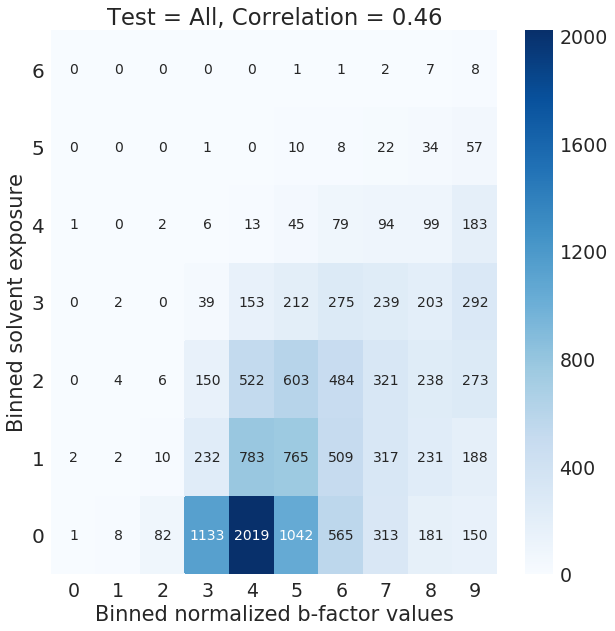

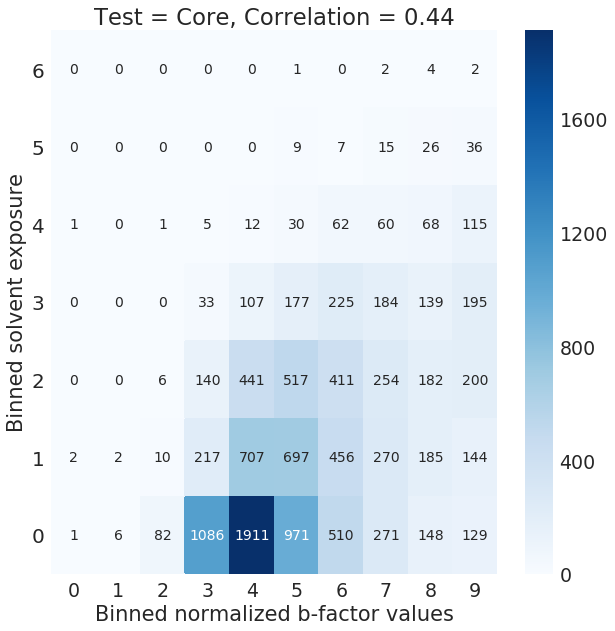

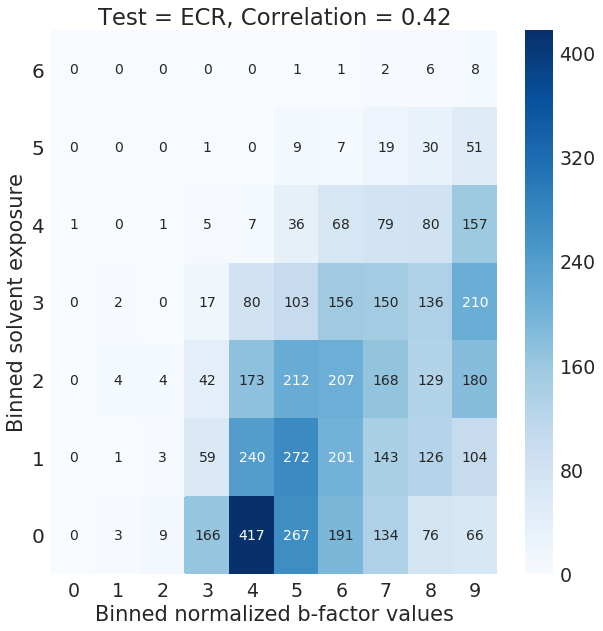

In [43]:
for t in range(0,3):
    test = "All"
    if t == 1:
        test = "Core"
    if t == 2:
        test = "ECR"
    torun = PixelDBecr
    ACount = dict()
    Abury = []
    Abfact = []
    for (seq,bury,ecr,size) in zip(torun["bfact"],torun["percent_exposed_alignment"],torun["core_ecr_alignment"],torun["size_of_binding_mode"]):
        if len(seq) != len(bury):
            continue
        for i in range(0,len(seq)):
            if seq[i] == "-":
                continue
            if seq[i] == "-":
                continue
            if t == 1:
                if ecr[i] == "E":
                    continue
            if t == 2:
                if ecr[i] == "C":
                        continue
            if seq[i] not in Count:
                Count[seq[i]] = dict()
            if bury[i] not in Count[seq[i]]:
                Count[seq[i]][bury[i]] = 0
            #print(i,seq[i],bury[i])
            if seq[i] not in ACount:
                ACount[seq[i]] = dict()
            if bury[i] not in ACount[seq[i]]:
                ACount[seq[i]][bury[i]] = 0
            ACount[seq[i]][bury[i]] += 1    
            Abfact.append(float(seq[i]))
            Abury.append(float(bury[i]))

    df = pd.DataFrame(ACount).fillna(0)

    df = df.reindex(["6","5","4","3","2","1","0"])
    g =  sns.heatmap(df,annot=True,annot_kws={"size": 14},fmt='g',cmap="Blues")
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
    plt.title("Test = %s, Correlation = %.2f" %(test,numpy.corrcoef(Abfact, Abury)[0, 1]))
    plt.ylabel("Binned solvent exposure")
    plt.xlabel("Binned normalized b-factor values")
    plt.show()
    




In [44]:
AllLen = []
for unid in list(unique(PixelDBoecr["unique_id"])):
    #Get id
    cid = re.split("_",unid)[0]
    
    lunid = len(unique(PixelDB[PixelDB["cluster_number"] == int(cid)]["unique_id"]))
    #print(cid,unid,lunid)
    AllLen.append(lunid)
    #break

In [45]:
np.sum(np.array(AllLen) != 1) / float(len(AllLen))

0.63934426229508201

In [46]:
NoDual.groupby(by="unique_id").mean().mean()["peptide_length"]

19.437499999999996

Mean=19.88 Min=8.00 Max=47.00


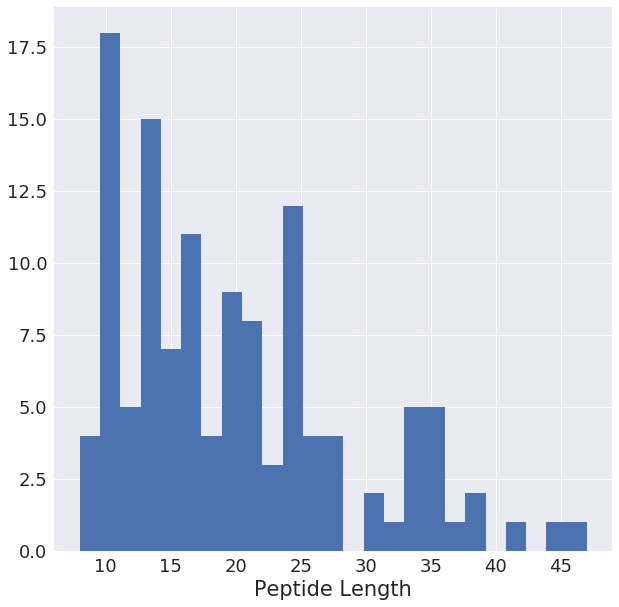

Mean=19.44 Min=8.00 Max=47.00


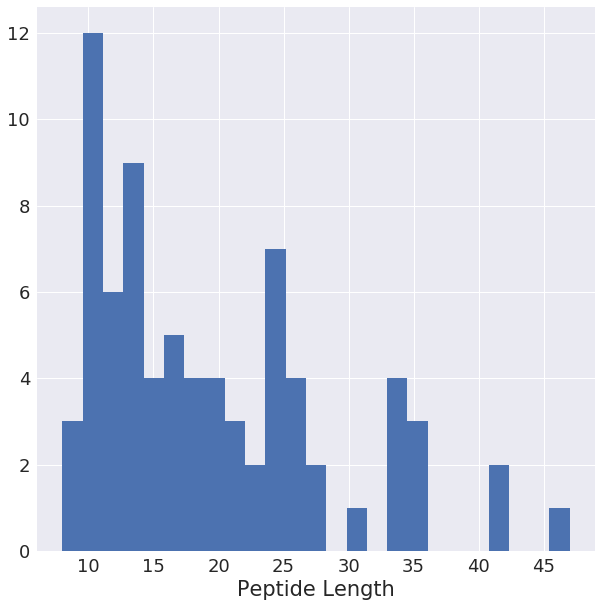

In [47]:
for i in range(0,2):
    s = NoDual["peptide_length"]
    if i == 1:
        s = NoDual.groupby(by="unique_id").mean()["peptide_length"]
    print("Mean=%.2f Min=%.2f Max=%.2f" % (s.mean(),s.min(),s.max()))

    plt.hist(s.values,25)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel("Peptide Length")
    plt.show()


In [48]:
torun = PixelDB

UniquePFAM = []
UniqueUnip = []
UniqueCATH = []

UniprotPerBindingMode = []
CATHPerBindingMode = []
PFAMPerBindingMode = []

StrPerBindingMode = []

for uniid in list(np.unique(torun["unique_id"])):
    sdf = torun[torun["unique_id"] == uniid]
    #print(sdf["sequence_alignment"])

    StrPerBindingMode.append(len(sdf))

    Uniuni = []
    for cid in sdf["uniprot"]:
        #print(cid.split("_"))
        if str(cid) != "nan":
            Uniuni += cid.split("_")
    UniprotPerBindingMode.append(len(list(set(Uniuni))))


    CATHuni = []
    for cid in sdf["CATH"]:
        #print(cid.split("_"))
        if str(cid) != "nan":
            CATHuni += cid.split("_")
    CATHPerBindingMode.append(len(list(set(CATHuni))))

    PFAMuni = []
    for cid in sdf["PFAM"]:
        #print(cid.split("_"))
        if str(cid) != "nan":
            PFAMuni += cid.split("_")
    PFAMPerBindingMode.append(len(list(set(PFAMuni))))

        #print("Binding mode with ECR and Core >= 4",len(PixelDBecr["unique_id"].value_counts()))
print("Unique Binding Mode",len(np.unique(torun["unique_id"])))
print("Strc Per Binding Mode",np.mean(StrPerBindingMode),np.median(StrPerBindingMode),np.min(StrPerBindingMode),np.max(StrPerBindingMode))
print("Uniprot Per Binding Mode",np.mean(UniprotPerBindingMode),np.median(UniprotPerBindingMode),np.min(UniprotPerBindingMode),np.max(UniprotPerBindingMode))
print("CATH Per Binding Mode",np.mean(CATHPerBindingMode),np.median(CATHPerBindingMode),np.min(CATHPerBindingMode),np.max(CATHPerBindingMode))
print("PFAM Per Binding Mode",np.mean(PFAMPerBindingMode),np.median(PFAMPerBindingMode),np.min(PFAMPerBindingMode),np.max(PFAMPerBindingMode))

('Unique Binding Mode', 728)
('Strc Per Binding Mode', 2.7005494505494507, 1.0, 1, 171)
('Uniprot Per Binding Mode', 1.445054945054945, 1.0, 0, 31)
('CATH Per Binding Mode', 1.3104395604395604, 1.0, 0, 7)
('PFAM Per Binding Mode', 1.0961538461538463, 1.0, 0, 10)


In [49]:
torun = PixelDB


UniquePFAM = []
UniqueUnip = []
UniqueCATH = []

UniprotPerBindingMode = []
CATHPerBindingMode = []
PFAMPerBindingMode = []

StrPerBindingMode = []

for uniid in list(np.unique(torun["cluster_number"])):
    sdf = torun[torun["cluster_number"] == uniid]
    #print(sdf["sequence_alignment"])

    StrPerBindingMode.append(len(sdf))

    Uniuni = []
    for cid in sdf["uniprot"]:
        #print(cid.split("_"))
        if str(cid) != "nan":
            Uniuni += cid.split("_")
    UniprotPerBindingMode.append(len(list(set(Uniuni))))


    CATHuni = []
    for cid in sdf["CATH"]:
        #print(cid.split("_"))
        if str(cid) != "nan":
            CATHuni += cid.split("_")
    CATHPerBindingMode.append(len(list(set(CATHuni))))

    PFAMuni = []
    for cid in sdf["PFAM"]:
        #print(cid.split("_"))
        if str(cid) != "nan":
            PFAMuni += cid.split("_")
    PFAMPerBindingMode.append(len(list(set(PFAMuni))))

        #print("Binding mode with ECR and Core >= 4",len(PixelDBecr["unique_id"].value_counts()))
print("Unique Cluster",len(np.unique(torun["cluster_number"])))
print("Strc Per Cluster",np.mean(StrPerBindingMode),np.median(StrPerBindingMode),np.min(StrPerBindingMode),np.max(StrPerBindingMode))
print("Uniprot Per Cluster",np.mean(UniprotPerBindingMode),np.median(UniprotPerBindingMode),np.min(UniprotPerBindingMode),np.max(UniprotPerBindingMode))
print("CATH Per Cluster",np.mean(CATHPerBindingMode),np.median(CATHPerBindingMode),np.min(CATHPerBindingMode),np.max(CATHPerBindingMode))
print("PFAM Per Cluster",np.mean(PFAMPerBindingMode),np.median(PFAMPerBindingMode),np.min(PFAMPerBindingMode),np.max(PFAMPerBindingMode))

('Unique Cluster', 486)
('Strc Per Cluster', 4.0452674897119341, 1.0, 1, 291)
('Uniprot Per Cluster', 1.8353909465020577, 1.0, 0, 46)
('CATH Per Cluster', 1.3374485596707819, 1.0, 0, 7)
('PFAM Per Cluster', 1.1954732510288066, 1.0, 0, 10)


In [50]:
#Number of binding mode per receptor cluster
NumBMbyClust = []
for clus in PixelDB["cluster_number"].unique():
    val = len(PixelDB[PixelDB["cluster_number"] == clus]["unique_id"].unique())
    if val > 10:print(clus,val)
    NumBMbyClust.append(val)
print("BM Per Cluster",np.mean(NumBMbyClust),np.median(NumBMbyClust),np.min(NumBMbyClust),np.max(NumBMbyClust))

(3, 13)
(4, 45)
(11, 11)
(27, 12)
('BM Per Cluster', 1.4979423868312758, 1.0, 1, 45)


In [51]:
AllWord = dict()
for v in list(PixelDB["title"]):
    #print(v)
    sp = re.split("\s+",v)
    for vsp in sp:
        if vsp not in AllWord:
            AllWord[vsp] = 0
        AllWord[vsp] += 1


In [52]:
WordCount = dict()
clustnum = 13
subdb = PixelDB[PixelDB["cluster_number"] == clustnum]
for (v,unid,pfam) in zip(subdb["title"],subdb["unique_id"],subdb["PFAM"]):
    print(v,unid,pfam)
    sp = re.split("\s+",v)
    for vsp in sp:
        if vsp not in WordCount:
            WordCount[vsp] = 0
        WordCount[vsp] += 1
#Renorm
Renorm = dict()
for vsp in WordCount:
    if WordCount[vsp] < 3:
        continue
    Renorm[vsp] = np.log(WordCount[vsp] / float(AllWord[vsp]))
for w in sorted(Renorm, key=Renorm.get, reverse=True)[0:20]:
    print("%20s %7.3f = log(%d/%d)" % (w, Renorm[w],WordCount[w],AllWord[w]))

('CRYSTAL STRUCTURE OF PIM1 KINASE IN COMPLEX WITH INHIBITOR 2TRANS 2 4AMINOCYCLOHEXYLAMINO43TRIFLUOROMETHYL 3 PHENYLAMINOPYRIDO43DPYRIMIDIN56HONE', '13_1', 'PF00069')
('CRYSTAL STRUCTURE OF HUMAN PROTOONCOGENE SERINE THREONINE KINASE 2 PIM1 IN COMPLEX WITH A CONSENSUS PEPTIDE AND A NAPHTHODIFURAN 3 LIGAND', '13_1', 'PF00069')
('CRYSTAL STRUCTURE OF HUMAN PIM1 IN COMPLEX WITH 2 IMIDAZOPYRIDAZIN I', '13_1', 'PF00069')
('CRYSTAL STRUCTURE OF HUMAN PROTOONCOGENE SERINE THREONINE KINASE 2 PIM1 IN COMPLEX WITH A CONSENSUS PEPTIDE AND A BETA CARBOLINE 3 LIGAND II', '13_1', 'PF00069')
('HUMAN PROTOONCOGENE SERINE THREONINE KINASE PIM1 IN COMPLEX WITH A 2 CONSENSUS PEPTIDE AND LEUCETTINE L41', '13_1', 'PF00069')
('CRYSTAL STRUCTURE OF HUMAN PROTOONCOGENE SERINE THREONINE KINASE 2 PIM1 IN COMPLEX WITH A CONSENSUS PEPTIDE AND THE JNK INHIBITOR V', '13_1', 'PF00069')
('CRYSTAL STRUCTURE OF HUMAN PROTOONCOGENE SERINE THREONINE KINASE 2 PIM1 IN COMPLEX WITH A CONSENSUS PEPTIDE AND A BETA CARBOLINE 

In [53]:
#Hepatocyte Growth Factor

In [54]:
PixelDB.columns

Index([u'name', u'pdb_id', u'pubmed_id', u'resolution', u'uniprot', u'PFAM',
       u'CATH', u'receptor_chain', u'receptor_length', u'peptide_chain',
       u'peptide_length', u'sequence_alignment', u'stride',
       u'percent_exposed_alignment', u'cluster_number', u'binding_mode',
       u'size_of_binding_mode', u'core_ecr_alignment',
       u'longest_continuous_core', u'longest_continuous_ecr',
       u'corebinding_aa', u'exosite_aa', u'surface_aa', u'interior_aa',
       u'corebinding_ss', u'exosite_ss', u'surface_ss', u'interior_ss',
       u'unique_id', u'COREBINDING_aa', u'COREBINDING_ss', u'EXOSITE_aa',
       u'EXOSITE_ss', u'bfact', u'bs_loc_type', u'full_peptide_sequece',
       u'mean_seq_iden_in_bm', u'mean_seq_iden_not_bm',
       u'min_dist_E_C_diff_bm', u'occupancy', u'pep_loc_type', u'title',
       u'full_peptide_sequece_len'],
      dtype='object')